In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import os
import pandas as pd
import cmath
from qiskit.quantum_info.operators import Operator
import qiskit


matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# All digits comparison

In [108]:
time_evolutions = np.linspace(0.05, 0.5, num=10) 
depths = np.linspace(2, 16, num=8, dtype=int)
nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

noiseless080_test = np.load("./digit_comparison/avg_classfication_data_080_12_noiseless.npz")["arr_0.npy"]
noisy080_test = np.load("./digit_comparison/avg_classfication_data_depth_12_080.npz")["arr_0.npy"]

noiseless087_test = np.load("./digit_comparison/avg_classfication_data_087_12_noiseless.npz")["arr_0.npy"]
noisy087_test = np.load("./digit_comparison/avg_classfication_data_depth_12.npz")["arr_0.npy"]

noiseless098_test = np.load("./digit_comparison/avg_classfication_data_noiseless_098_12.npz")["arr_0.npy"]
noisy098_test = np.load("./digit_comparison/avg_classfication_data_depth_12_098.npz")["arr_0.npy"]

m = np.copy(np.flip(noiseless080_test, 0))
for row in range(m.shape[0]):
    for col in range(m.shape[1]):
        m[row][col] = 0 if m[row][col] > 0 else 1


(a)
(b)
(c)
(d)
(e)
(f)


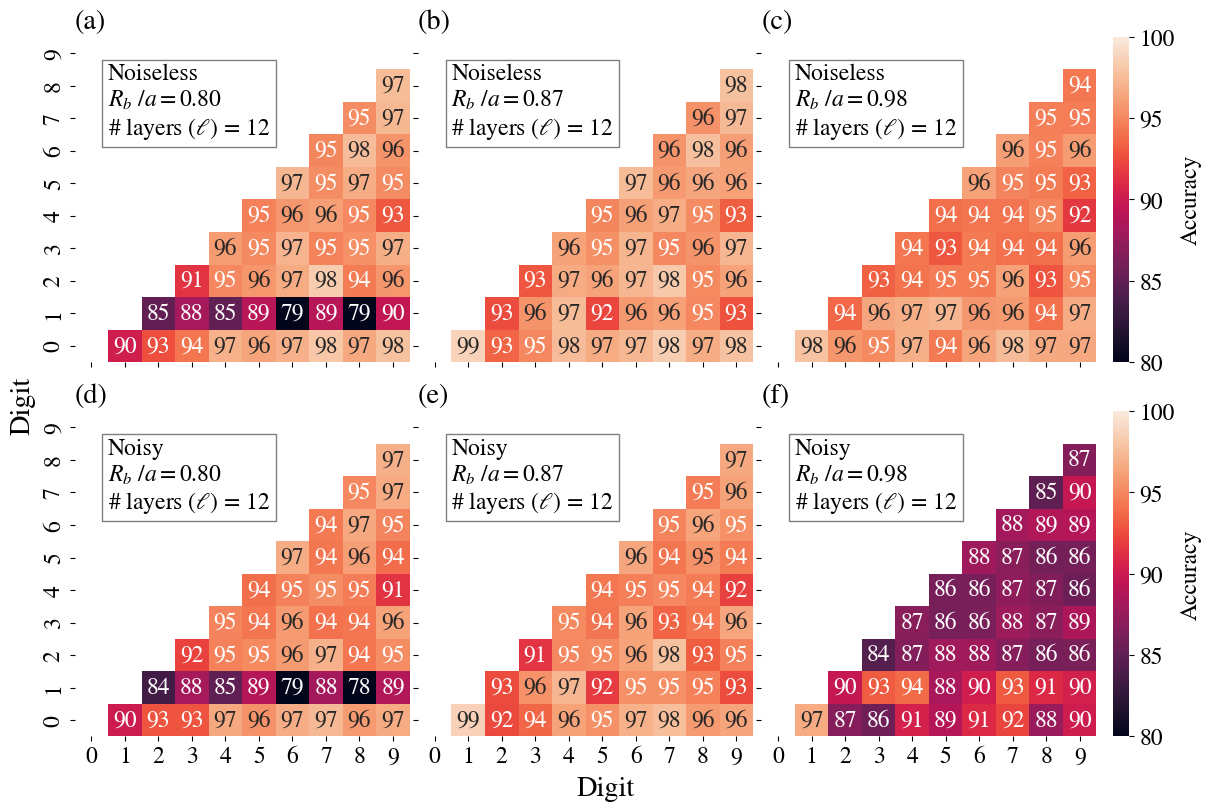

In [109]:
label_size = 17

matplotlib.rcParams.update({'font.size': label_size})
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size 


vmin = 80
vmax = 100
fig, axs = plt.subplot_mosaic([['(a)', '(b)', '(c)'], ['(d)', '(e)', '(f)']], sharex=True, sharey=True, figsize=(12, 8), layout='constrained')
for label, ax in axs.items():
    ax.set_title(label, loc='left', fontsize='large')
    print(label)
    if label == "(a)":
        # ax.set_title("0.80 noiseless", fontsize='large')
        ax.text(1, 3, 'Noiseless\n$R_b ~/ a = 0.80$ \n# layers ($\ell$) = 12', fontsize=label_size, bbox=dict(facecolor='white', alpha=0.5))

        sns.heatmap(np.flip(noiseless080_test * 100, 0), annot=True, xticklabels=nums, yticklabels=np.flip(nums), vmin=vmin, vmax=100, mask=m, ax=ax, cbar=False)
    if label == "(d)":
        # ax.set_title("0.80 noisy", fontsize='large')
        ax.text(1, 3, 'Noisy\n$R_b ~/ a = 0.80$ \n# layers ($\ell$) = 12', fontsize=label_size, bbox=dict(facecolor='white', alpha=0.5))

        sns.heatmap(np.flip(noisy080_test * 100, 0), annot=True, xticklabels=nums, yticklabels=np.flip(nums), vmin=vmin, vmax=100,  mask=m, ax=ax, cbar=False)
    if label == "(b)":
        # ax.set_title("0.87 noiseless", fontsize='large')
        ax.text(1, 3, 'Noiseless\n$R_b ~/ a = 0.87$ \n# layers ($\ell$) = 12', fontsize=label_size, bbox=dict(facecolor='white', alpha=0.5))

        sns.heatmap(np.flip(noiseless087_test * 100, 0), annot=True, xticklabels=nums, yticklabels=np.flip(nums), vmin=vmin, vmax=100,  mask=m, ax=ax, cbar=False)
    if label == "(e)":
        # ax.set_title("0.87 noisy", fontsize='large')
        ax.text(1, 3, 'Noisy\n$R_b ~/ a = 0.87$ \n# layers ($\ell$) = 12', fontsize=label_size, bbox=dict(facecolor='white', alpha=0.5))

        sns.heatmap(np.flip(noisy087_test * 100, 0), annot=True, xticklabels=nums, yticklabels=np.flip(nums), vmin=vmin, vmax=100,  mask=m, ax=ax, cbar=False)
    if label == "(c)":
        # ax.set_title("0.98 noiseless", fontsize='large')QM
        ax.text(1, 3, 'Noiseless\n$R_b ~/ a = 0.98$ \n# layers ($\ell$) = 12', fontsize=label_size, bbox=dict(facecolor='white', alpha=0.5))

        sns.heatmap(np.flip(noiseless098_test * 100, 0), annot=True, xticklabels=nums, yticklabels=np.flip(nums), vmin=vmin, vmax=100,  mask=m, ax=ax,  cbar_kws={'label': 'Accuracy'})
    if label == "(f)":
        # ax.set_title("0.98 noisy", fontsize='large')
        ax.text(1, 3, 'Noisy\n$R_b ~/ a = 0.98$ \n# layers ($\ell$) = 12', fontsize=label_size, bbox=dict(facecolor='white', alpha=0.5))

        sns.heatmap(np.flip(noisy098_test * 100, 0), annot=True, xticklabels=nums, yticklabels=np.flip(nums), vmin=vmin, vmax=100,  mask=m, ax=ax, cbar_kws={'label': 'Accuracy'})

fig.supxlabel("Digit")
fig.supylabel("Digit")
plt.savefig('compare_rba.png', dpi=600)
plt.show()


# Digital Noiseless vs Noisy

In [110]:
cnot_noisy= np.load("./digital_comparison/avg_classfication_data_cnot_12.npz")["arr_0.npy"]
cnot_noiseless = np.load("./digital_comparison/avg_classfication_data_cnot_noiseless_12.npz")["arr_0.npy"]

(a)
(b)


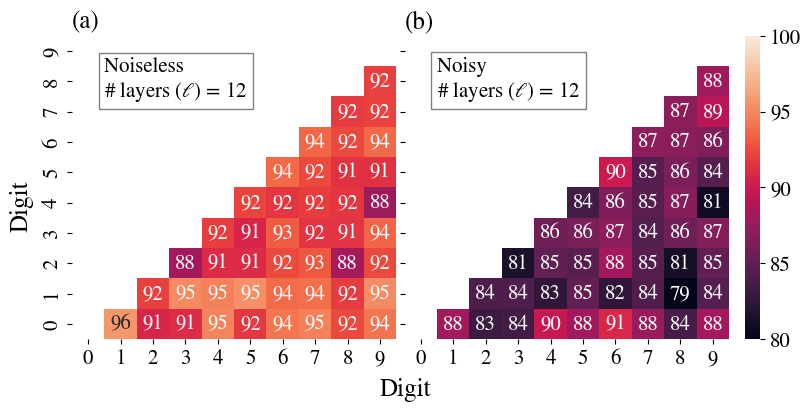

In [111]:
# digital all digits
label_size = 15

matplotlib.rcParams.update({'font.size': label_size})
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size 

nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

vmin = 80
vmax = 100
fig, axs = plt.subplot_mosaic([['(a)', '(b)']], sharex=True, sharey=True, figsize=(8, 4), layout='constrained')
for label, ax in axs.items():
    ax.set_title(label, loc='left', fontsize='large')
    print(label)
    if label == "(a)":
        # ax.set_title("noiseless", fontsize='large')
        ax.set_xlabel("digit")
        ax.set_ylabel("digit")
        ax.text(1, 2, 'Noiseless \n# layers ($\ell$) = 12', fontsize=label_size, bbox=dict(facecolor='white', alpha=0.5))

        sns.heatmap(np.flip(cnot_noiseless * 100, 0), annot=True, xticklabels=nums, yticklabels=np.flip(nums), vmin=vmin, vmax=100, mask=m, ax=ax, cbar=False)
    if label == "(b)":
        # ax.set_title("noisy", fontsize='large')

        ax.text(1, 2, 'Noisy \n# layers ($\ell$) = 12', fontsize=label_size, bbox=dict(facecolor='white', alpha=0.5))

        sns.heatmap(np.flip(cnot_noisy * 100, 0), annot=True, xticklabels=nums, yticklabels=np.flip(nums), vmin=vmin, vmax=100,  mask=m, ax=ax)

fig.supxlabel("Digit")
fig.supylabel("Digit")
plt.savefig('cnot_12_all_compare.png', dpi=600)
plt.show()

# Average accuracy between systems

In [112]:
from itertools import combinations

depths = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
avg_accuracy_over_pairs_cnot_noiseless = []
nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
combos = list(combinations([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2))
num_pairs = len(combos)


In [113]:
avg_accuracy_over_pairs = []
stds = []

for d in depths:
    data = np.load(f"./average_accuracies_across_depths/avg_classfication_data_depth_{d}.npz")["arr_0.npy"]
    s = np.sum(data)
    s_no_zero = [num for num in data.flatten() if num]
    std = np.std(s_no_zero)

    avg = s/num_pairs
    avg_accuracy_over_pairs.append(avg)
    stds.append(std)


avg_accuracy_over_pairs_cnot = []
std_over_cnot = []

for dc in depths:
    data = np.load(f"./average_accuracies_across_depths/avg_classfication_data_cnot_{dc}.npz")["arr_0.npy"]
    sc = np.sum(data)
    sc_no_zero = [num for num in data.flatten() if num]
    stdc = np.std(sc_no_zero)
    avgc = sc/num_pairs
    avg_accuracy_over_pairs_cnot.append(avgc)
    std_over_cnot.append(stdc)


In [114]:

avg_accuracy_over_pairs_noiseless = []

stds_cnot_noiseless = []
std_da_noiseless = []

for d in depths:
    data = None
    if d == 12:
        data = np.load(f"./average_accuracies_across_depths/avg_classfication_data_12_0.87_0.87.npz")["arr_0.npy"]
    else:
        data = np.load(f"./average_accuracies_across_depths/avg_classfication_data_noiseless_{d}_0.87_0.87.npz")["arr_0.npy"]


    s = np.sum(data)
    s_no_zero = [num for num in data.flatten() if num]
    std = np.std(s_no_zero)

    avg = s/num_pairs
    avg_accuracy_over_pairs_noiseless.append(avg)
    std_da_noiseless.append(std)

#cnot
for d in depths:
    data = np.load(f"./average_accuracies_across_depths/avg_classfication_data_cnot_noiseless_{d}.npz")["arr_0.npy"]
    s = np.sum(data)
    s_no_zero = [num for num in data.flatten() if num]
    std = np.std(s_no_zero)

    avg = s/num_pairs
    avg_accuracy_over_pairs_cnot_noiseless.append(avg)
    stds_cnot_noiseless.append(std)



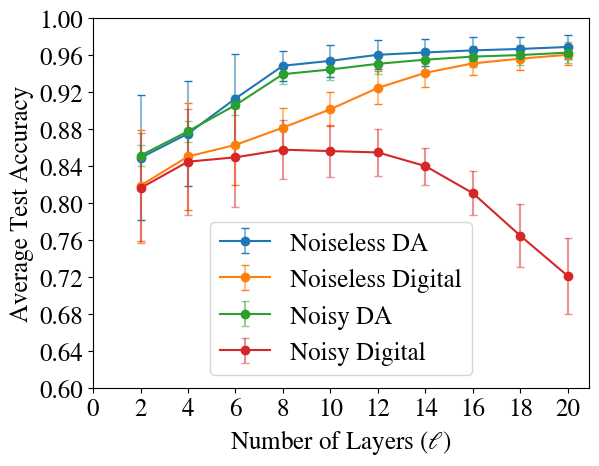

In [115]:
label_size = 18

matplotlib.rcParams.update({'font.size': label_size})
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size 

markers2_noiseless, caps2_noiseless, caps2_noiseless = plt.errorbar(depths, avg_accuracy_over_pairs_noiseless, yerr=std_da_noiseless, capsize=3, marker="o", label="Noiseless DA")
[bar.set_alpha(0.5) for bar in caps2_noiseless]
[cap.set_alpha(0.5) for cap in caps2_noiseless]

markers, bars_noiseless, bars_noiseless = plt.errorbar(depths, avg_accuracy_over_pairs_cnot_noiseless, yerr=stds_cnot_noiseless, capsize=3, marker="o", label="Noiseless Digital")
[bar.set_alpha(0.5) for bar in bars_noiseless]
[cap.set_alpha(0.5) for cap in bars_noiseless]

markers, caps, bars = plt.errorbar(depths, avg_accuracy_over_pairs, yerr=std, capsize=3, marker="o", label="Noisy DA")
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]

markers2, caps2, bars2 = plt.errorbar(depths, avg_accuracy_over_pairs_cnot, yerr=std_over_cnot, capsize=3, marker="o", label="Noisy Digital")
[bar.set_alpha(0.5) for bar in bars2]
[cap.set_alpha(0.5) for cap in caps2]
plt.xlabel("Number of Layers ($\ell$)")
plt.ylabel("Average Test Accuracy")
plt.yticks(np.linspace(0.6, 1, 11))
plt.xticks(range(0, 21, 2))
plt.legend()
plt.show()

# Fidelity Plot

In [116]:
rba_fidelities = np.load("./fidelity_plot/diff_rba_avg_f.npy")
rba_stddev = np.load("./fidelity_plot/diff_rba_stddev_f.npy")

In [117]:
cnot_fids = np.load("./fidelity_plot/cnot_fids.npy")
cnot_std = np.load("./fidelity_plot/cnot_std.npy")
ryd_fids = np.load("./fidelity_plot/ryd_fids.npy")
ryd_std = np.load("./fidelity_plot/ryd_std.npy")

num_qubits = [2, 4, 6, 8, 10, 12 ,14]
rbas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,0.8999999999999999, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]


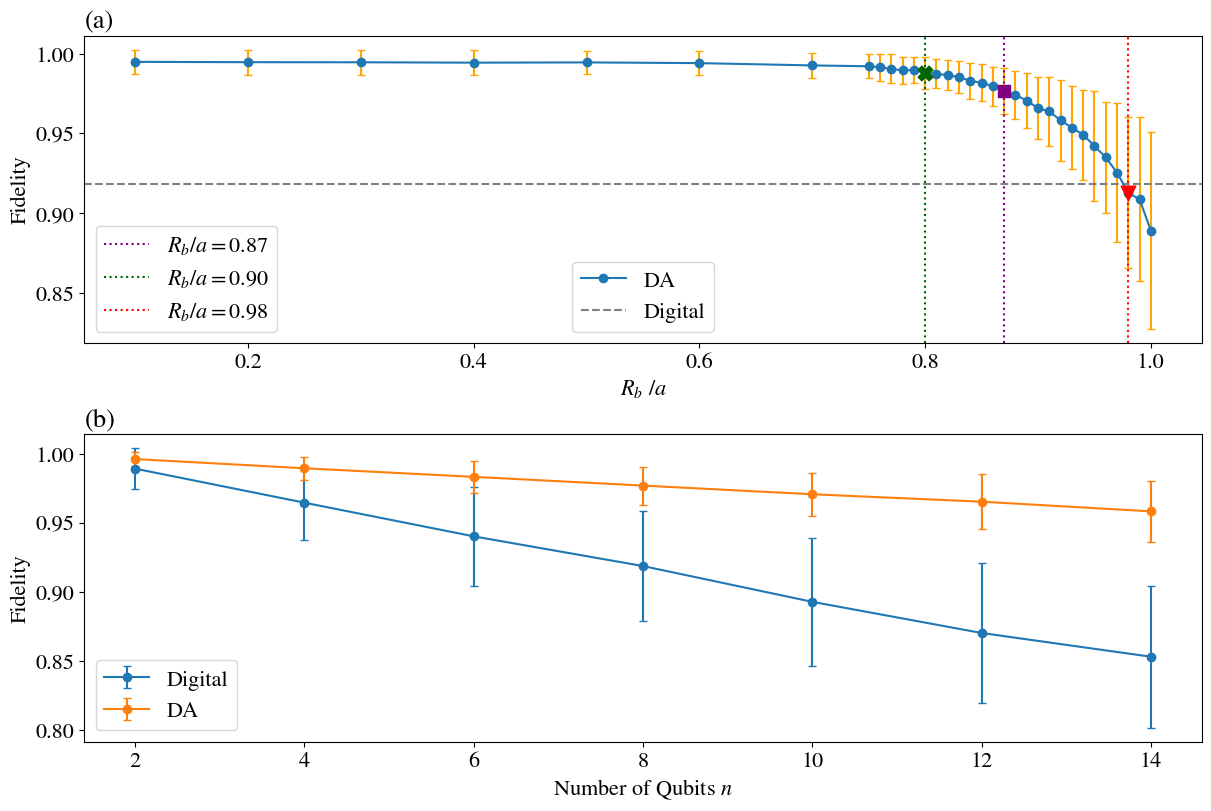

In [118]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# sns.set_theme()
sns.reset_orig()

font = {'family' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

label_size = 16

matplotlib.rcParams.update({'font.size': label_size})
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size 

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

fig, axs = plt.subplot_mosaic([['(a)'], ['(b)']], figsize=(12, 8), layout='constrained')
for label, ax in axs.items():
    ax.set_title(label, loc='left', fontsize='large')
    if label == "(a)":
        (line_f, caps, _) = ax.errorbar(rbas, rba_fidelities, yerr=rba_stddev,linestyle='-', marker='o', capsize=3, ecolor="orange", label="DA")
        for cap in caps:
            cap.set_markeredgewidth(1)

        line_f.set_label("DA")


        ax.scatter([0.87], [rba_fidelities[rbas.index(0.87)]], marker="s", zorder=2.5, color="purple", s=80)
        line87 = ax.axvline(x=0.87, color="purple", label="$R_b/a = 0.87$", linestyle=':')

        ax.scatter(0.98, rba_fidelities[rbas.index(0.98)], marker="v", zorder=2.5, color="red", s=110)
        line98 = ax.axvline(x=0.98, color="red", label="$R_b/a = 0.98$", linestyle=':')

        ax.scatter(0.80, rba_fidelities[rbas.index(0.80)], marker="X", zorder=2.5, color="darkgreen", s=110)
        line80 = ax.axvline(x=0.80, color="darkgreen", label="$R_b/a = 0.90$", linestyle=':')

        line_cnot = ax.axhline(y=0.9182305382223596, color='gray', linestyle='--', label="Digital")

        leg1 = ax.legend(handles=[line87, line80, line98], loc='lower left', frameon=True)
        ax.add_artist(leg1)

        ax.set_xlabel("$R_b~/a$")
        ax.set_ylabel("Fidelity")
        # plt.title("Fidelity Using Different Rb/a Values")

        ax.legend(handles=[line_f, line_cnot], loc='lower center', frameon=True)

    if label == "(b)":
        (_, caps, _) = plt.errorbar(num_qubits, cnot_fids, yerr=cnot_std,linestyle='-', marker='o', capsize=3, label="Digital")
        for cap in caps:
            cap.set_markeredgewidth(1)
        (_, caps, _) = plt.errorbar(num_qubits, ryd_fids, yerr=ryd_std,linestyle='-', marker='o', capsize=3,  label="DA")
        for cap in caps:
            cap.set_markeredgewidth(1)

        ax.legend()
        ax.set_xlabel("Number of Qubits $n$")
        ax.set_ylabel("Fidelity")


plt.savefig("./composite_fid.png")
plt.show()


# CNOT comparison on 1 vs 9

In [119]:
cnot_noiseless_1v9 = np.load("./CNOT_comparison_1v9/avg_classfication_data_cnot_noiseless_1v9.npz")["arr_0.npy"]
cnot_noisy_1v9 = np.load("./CNOT_comparison_1v9/avg_classfication_data_cnot_noisy.npz")["arr_0.npy"]

cnot_std_noiseless = np.load("./CNOT_comparison_1v9/std_dev_cnot_noiseless.npz")["arr_0.npy"]
cnot_std_noisy = np.load("./CNOT_comparison_1v9/std_dev_cnot_noisy.npz")["arr_0.npy"]
depths, dstep = np.linspace(2, 20, num=10, dtype=int, retstep=True)


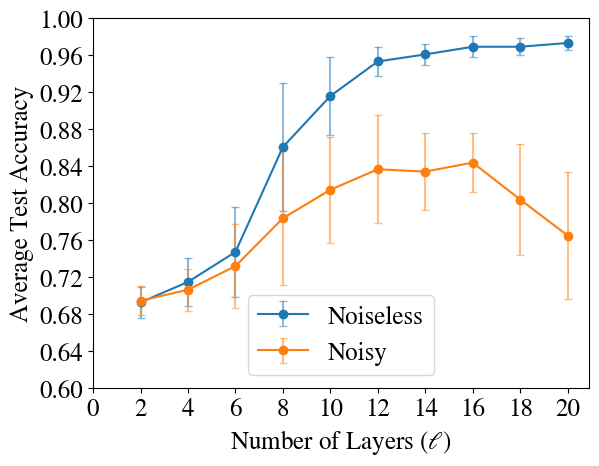

In [120]:
label_size = 18

matplotlib.rcParams.update({'font.size': label_size})
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size 

markers, caps, bars = plt.errorbar(depths, cnot_noiseless_1v9, yerr=cnot_std_noiseless, capsize=3, marker="o", label="Noiseless")
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]
markers2, caps2, bars2 = plt.errorbar(depths, cnot_noisy_1v9, yerr=cnot_std_noisy, capsize=3, marker="o", label="Noisy")
[bar.set_alpha(0.5) for bar in bars2]
[cap.set_alpha(0.5) for cap in caps2]
plt.xlabel("Number of Layers ($\ell$)")
plt.ylabel("Average Test Accuracy")
plt.yticks(np.linspace(0.6, 1, 11))
plt.xticks(range(0, 21, 2))
plt.legend()
plt.show()

# Training, Test on Noisy and Noiseless for 3 vs 8

In [121]:
bin087_3v8_noiseless = np.load("./3v8_plot/0.87_3v8_noiseless.npz")["arr_0.npy"]
bon087_3v8_noisy = np.load("./3v8_plot/noisy087-3v8.npz")["arr_0.npy"]
bin087_3v8_noiseless_training = np.load("./3v8_plot/training_avg087_3v8.npz")["arr_0.npy"]

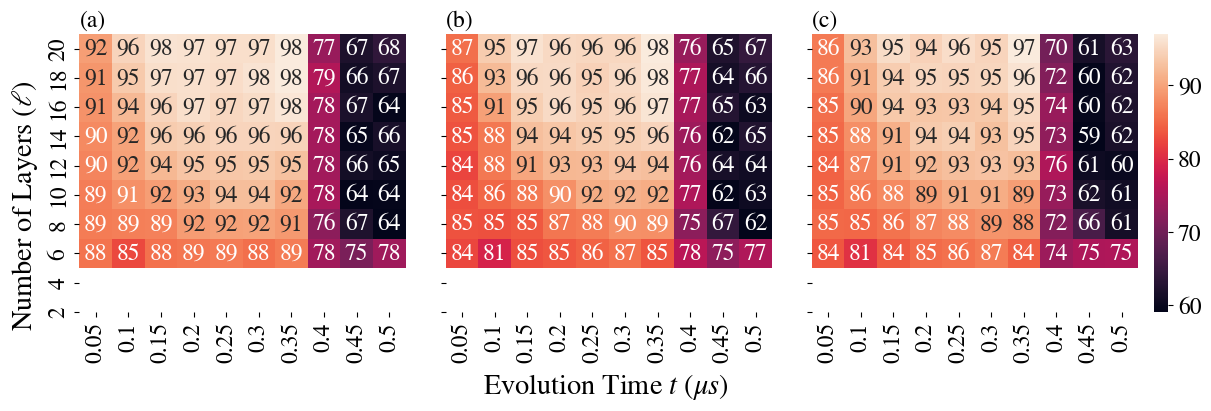

In [122]:
label_size = 17

matplotlib.rcParams.update({'font.size': label_size})
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size 

fig, axs = plt.subplot_mosaic([['(a)', '(b)', '(c)']], sharex=True, sharey=True, figsize=(12, 4), layout='constrained', gridspec_kw={"wspace": 0.1})

for label, ax in axs.items():
    ax.set_title(label, loc='left', fontsize='medium')
    if label == "(a)":
        # ax.set_title("0.87 noiseless", fontsize='large')
        ax.tick_params(labelrotation=90)
        sns.heatmap(np.flip(bin087_3v8_noiseless_training.T * 100, 0), annot=True, xticklabels=np.char.mod('%.4s', time_evolutions.astype(str)), yticklabels=np.flip(depths), ax=ax, cbar=False)
    if label == "(b)":
        # ax.set_title("0.87 noiseless", fontsize='large')
        ax.tick_params(labelrotation=90)
        sns.heatmap(np.flip(bin087_3v8_noiseless.T * 100, 0), annot=True, xticklabels=np.char.mod('%.4s', time_evolutions.astype(str)), yticklabels=np.flip(depths), ax=ax, cbar=False)
    if label == "(c)":
        ax.tick_params(labelrotation=90)
        # ax.set_title("0.87 noisy", fontsize='large')
        sns.heatmap(np.flip(bon087_3v8_noisy.T * 100, 0), annot=True, xticklabels=np.char.mod('%.4s', time_evolutions.astype(str)), yticklabels=np.flip(depths), ax=ax)

fig.supxlabel("Evolution Time $t$ ($\mu s$)")
fig.supylabel("Number of Layers ($\ell$)")

plt.show()

# Parameterizing the digital gate
We use the same gate we define for cnot that takes in some angle theta, and use this as a parameterized comparison to adjusting for rb/a in the digital analog gates

### Finding std for noise such that fidelity = 0.99
We do this using a numerical method to get a good estimate

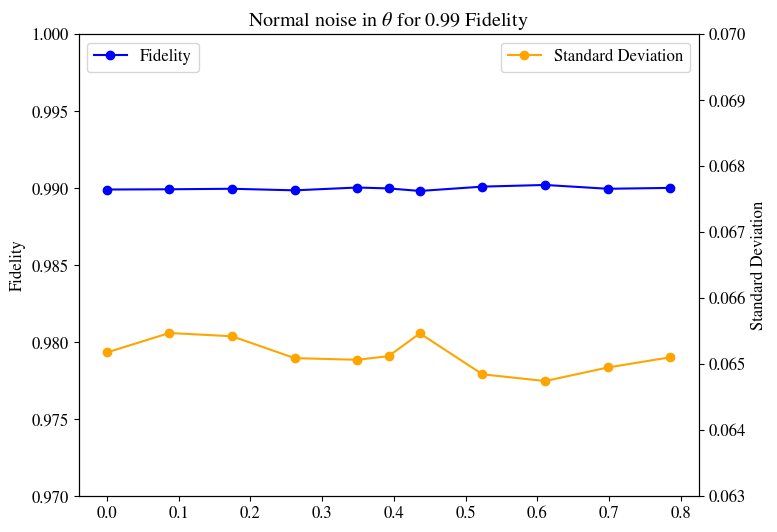

In [17]:
def crot(theta):
    exp = cmath.exp(-4j * theta)
    mat = [
        [1,0,0,0],
        [0, 0.5 * (1 + exp), 0, 0.5 - 0.5 * exp],
        [0, 0, 1, 0],
        [0, 0.5- 0.5* exp, 0, 0.5 *(1 + exp)]
    ]
    return Operator(mat)

angles = [0.0,
 0.08726646259971647,
 0.17453292519943295,
 0.2617993877991494,
 0.3490658503988659,
 0.39269908169872414,
 0.4363323129985824,
 0.5235987755982988,
 0.6108652381980153,
 0.6981317007977318,
 0.7853981633974483]

sds = [0.06517825219898547,
 0.0654736884583,
 0.06542425102529056,
 0.06509308366627503,
 0.06506797432972072,
 0.06512263232273056,
 0.06546794860105694,
 0.06484788239049244,
 0.0647457103071939,
 0.06495096376512864,
 0.06510602350749442]

sample_size = 50000  
gen = np.random.default_rng()

def crot_fid_calc(theta, sd):
    sample = gen.normal(0, sd, size=sample_size)
    fs = []
    for s in sample:
        fs.append(qiskit.quantum_info.average_gate_fidelity(crot(theta+s), target=crot(theta)))
    avg_f = np.mean(fs)
    sd_f = np.std(fs)
    return avg_f, sd_f


fids = []
sd_fids = []
for i in range(len(angles)):
    res = crot_fid_calc(angles[i], sds[i])
    fids.append(res[0])
    sd_fids.append(res[1])

fig, ax1 = plt.subplots(figsize=(8, 6))

# ax1.errorbar(angles, fids, yerr=sd_fids, fmt='-o', capsize=5, color='green', label='Values')
ax1.plot(angles, fids, label="Fidelity", color="blue", marker="o")

ax1.set_ylim(0.97, 1)
ax1.set_ylabel("Fidelity")
ax1.legend(loc="upper left")
plt.title(r"Normal noise in $\theta$ for 0.99 Fidelity")

ax2 = ax1.twinx()
ax2.plot(angles, sds, label="Standard Deviation", color="orange", marker='o')
ax2.set_ylim(0.063, 0.07)
ax2.set_ylabel("Standard Deviation")
ax2.set_xlabel("Rotation Angle (Radians)")

ax2.legend()

Using these sds for noise, we generate the noiseless and noisy accuracies of these gates at depth 16 for the MNIST data

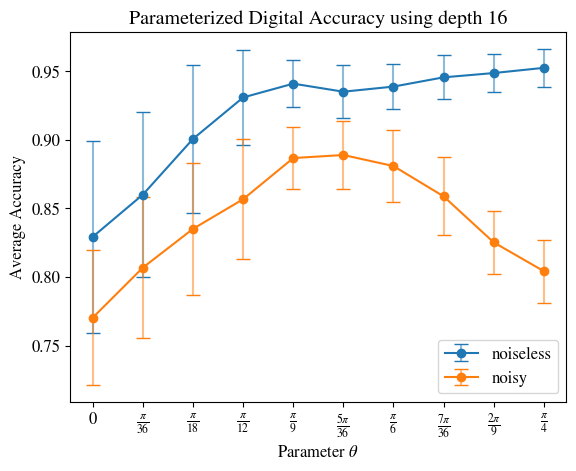

In [9]:
DATA_DIR = "./parameterized_digital_data"
data_dict = {}
noisy_data_dict = {}


for directory in os.listdir(DATA_DIR):
    strls = directory.split(sep="_")
    if "noiseless" in strls:
        theta = strls[-1][0:-4]

        data_dict[theta] = np.load(os.path.join(DATA_DIR,directory))["arr_0"]

    if "noisy" in strls:
        theta = strls[-1][0:-4]

        noisy_data_dict[theta] = np.load(os.path.join(DATA_DIR,directory))["arr_0"]
res = []

for theta, data in data_dict.items():
    sd = data[data != 0].std()
    mean_acc = data[data != 0].mean()
    res.append([theta, mean_acc, sd])

data_df = pd.DataFrame(res, columns=["theta", "mean_accuracy", "std_over_digits"])
data_df = data_df.sort_values(by="theta")

noisy_res = []

for theta, data in noisy_data_dict.items():
    sd = data[data != 0].std()
    mean_acc = data[data != 0].mean()
    noisy_res.append([theta, mean_acc, sd])

noisy_data_df = pd.DataFrame(noisy_res, columns=["theta", "mean_accuracy", "std_over_digits"])
noisy_data_df = noisy_data_df.sort_values(by="theta")

font = {'family' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

label_size = 12

matplotlib.rcParams.update({'font.size': label_size})
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size 

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

_ , _ , nl_bars = plt.errorbar(data_df["theta"], data_df["mean_accuracy"], data_df["std_over_digits"], capsize=5, marker='o', label="noiseless")
_, _, ny = plt.errorbar(noisy_data_df["theta"], noisy_data_df["mean_accuracy"], noisy_data_df["std_over_digits"], capsize=5, marker='o', label="noisy")
[bar.set_alpha(0.5) for bar in nl_bars]
[bar.set_alpha(0.5) for bar in ny]

plt.title("Parameterized Digital Accuracy using depth 16")
plt.ylabel("Average Accuracy")
plt.xlabel(r"Parameter $\theta$")
plt.xticks(data_df["theta"], labels=["0", r'$\frac{\pi}{36}$', r'$\frac{\pi}{18}$', r'$\frac{\pi}{12}$', r'$\frac{\pi}{9}$', r'$\frac{5\pi}{36}$', r'$\frac{\pi}{6}$', r'$\frac{7\pi}{36}$', r'$\frac{2\pi}{9}$', r'$\frac{\pi}{4}$'])
plt.legend()

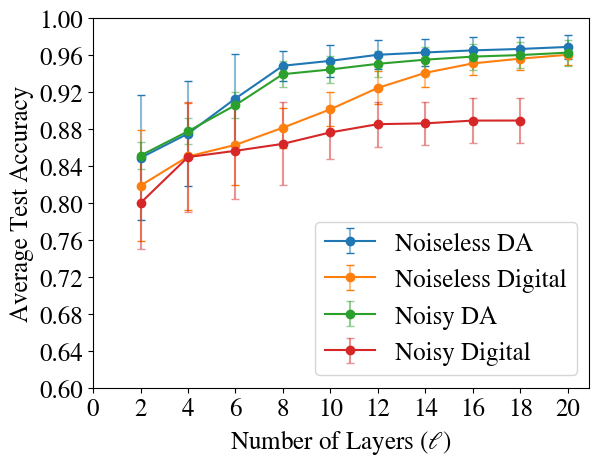

In [24]:
from itertools import combinations

depths = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
avg_accuracy_over_pairs_cnot_noiseless = []
nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
combos = list(combinations([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2))
num_pairs = len(combos)
avg_accuracy_over_pairs_noiseless = []

stds_cnot_noiseless = []
std_da_noiseless = []

for d in depths:
    data = None
    if d == 12:
        data = np.load(f"./average_accuracies_across_depths/avg_classfication_data_12_0.87_0.87.npz")["arr_0.npy"]
    else:
        data = np.load(f"./average_accuracies_across_depths/avg_classfication_data_noiseless_{d}_0.87_0.87.npz")["arr_0.npy"]


    s = np.sum(data)
    s_no_zero = [num for num in data.flatten() if num]
    std = np.std(s_no_zero)

    avg = s/num_pairs
    avg_accuracy_over_pairs_noiseless.append(avg)
    std_da_noiseless.append(std)

#cnot
for d in depths:
    data = np.load(f"./average_accuracies_across_depths/avg_classfication_data_cnot_noiseless_{d}.npz")["arr_0.npy"]
    s = np.sum(data)
    s_no_zero = [num for num in data.flatten() if num]
    std = np.std(s_no_zero)

    avg = s/num_pairs
    avg_accuracy_over_pairs_cnot_noiseless.append(avg)
    stds_cnot_noiseless.append(std)

avg_accuracy_over_pairs = []
stds = []

for d in depths:
    data = np.load(f"./average_accuracies_across_depths/avg_classfication_data_depth_{d}.npz")["arr_0.npy"]
    s = np.sum(data)
    s_no_zero = [num for num in data.flatten() if num]
    std = np.std(s_no_zero)

    avg = s/num_pairs
    avg_accuracy_over_pairs.append(avg)
    stds.append(std)


avg_accuracy_over_pairs_cnot = []
std_over_cnot = []

cnot_noisy_d = [2, 4, 6, 8, 10, 12, 14, 16, 18]
for dc in cnot_noisy_d:
    data = np.load(f"./parameterized_digital_data/pi8noisy/avg_classfication_data_noisy_{dc}_theta_0.39269908169872414.npz")["arr_0.npy"]
    sc = np.sum(data)
    sc_no_zero = [num for num in data.flatten() if num]
    stdc = np.std(sc_no_zero)
    avgc = sc/num_pairs
    avg_accuracy_over_pairs_cnot.append(avgc)
    std_over_cnot.append(stdc)


label_size = 18

matplotlib.rcParams.update({'font.size': label_size})
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size 

markers2_noiseless, caps2_noiseless, caps2_noiseless = plt.errorbar(depths, avg_accuracy_over_pairs_noiseless, yerr=std_da_noiseless, capsize=3, marker="o", label="Noiseless DA")
[bar.set_alpha(0.5) for bar in caps2_noiseless]
[cap.set_alpha(0.5) for cap in caps2_noiseless]

markers, bars_noiseless, bars_noiseless = plt.errorbar(depths, avg_accuracy_over_pairs_cnot_noiseless, yerr=stds_cnot_noiseless, capsize=3, marker="o", label="Noiseless Digital")
[bar.set_alpha(0.5) for bar in bars_noiseless]
[cap.set_alpha(0.5) for cap in bars_noiseless]

markers, caps, bars = plt.errorbar(depths, avg_accuracy_over_pairs, yerr=std, capsize=3, marker="o", label="Noisy DA")
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]

markers2, caps2, bars2 = plt.errorbar(cnot_noisy_d, avg_accuracy_over_pairs_cnot, yerr=std_over_cnot, capsize=3, marker="o", label="Noisy Digital")
[bar.set_alpha(0.5) for bar in bars2]
[cap.set_alpha(0.5) for cap in caps2]
plt.xlabel("Number of Layers ($\ell$)")
plt.ylabel("Average Test Accuracy")
plt.yticks(np.linspace(0.6, 1, 11))
plt.xticks(range(0, 21, 2))
plt.legend()
plt.show()

### Updated fidelity plot 

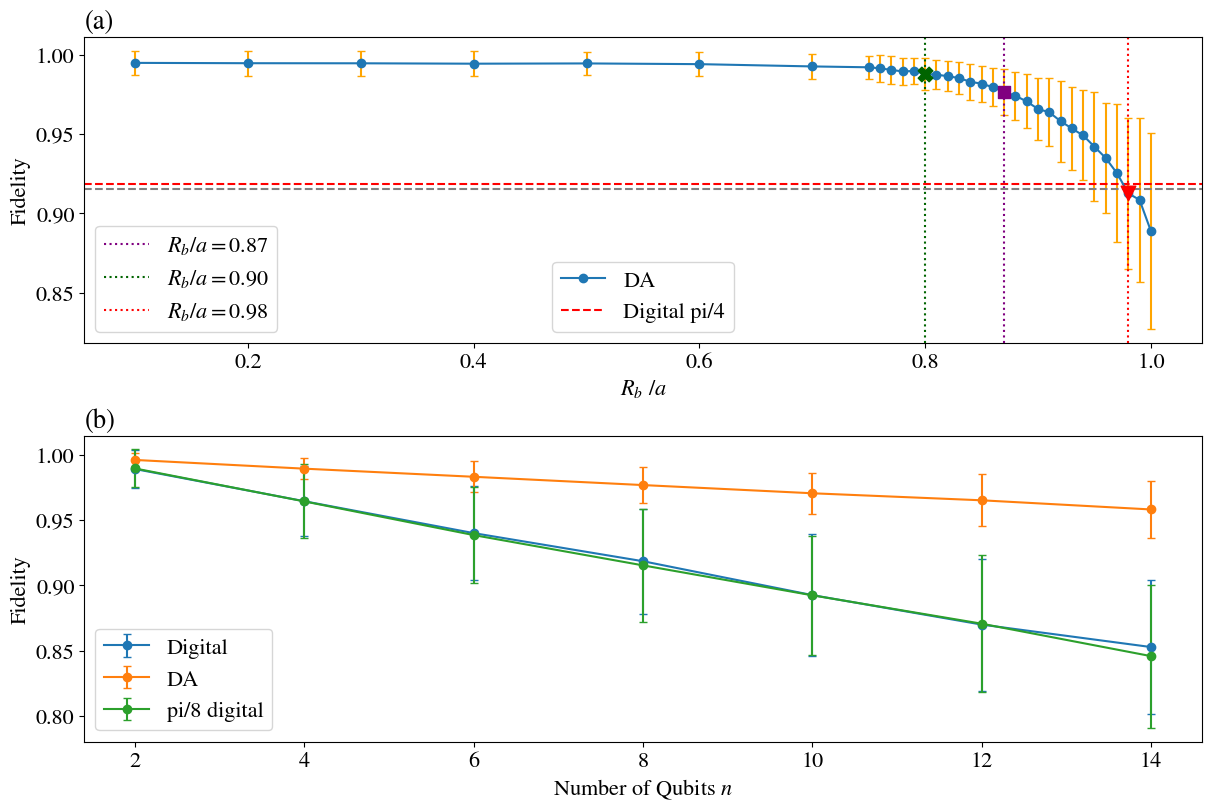

In [31]:
rba_fidelities = np.load("./fidelity_plot/diff_rba_avg_f.npy")
rba_stddev = np.load("./fidelity_plot/diff_rba_stddev_f.npy")
cnot_fids = np.load("./fidelity_plot/cnot_fids.npy")
cnot_std = np.load("./fidelity_plot/cnot_std.npy")
p8_fids = np.load("./fidelity_plot/pdigital_p8_fids.npy")
p8_std = np.load("./fidelity_plot/pdigital_p8_stds.npy")
ryd_fids = np.load("./fidelity_plot/ryd_fids.npy")
ryd_std = np.load("./fidelity_plot/ryd_std.npy")

num_qubits = [2, 4, 6, 8, 10, 12 ,14]
rbas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,0.8999999999999999, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# sns.set_theme()
sns.reset_orig()

font = {'family' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

label_size = 16

matplotlib.rcParams.update({'font.size': label_size})
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size 

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

fig, axs = plt.subplot_mosaic([['(a)'], ['(b)']], figsize=(12, 8), layout='constrained')
for label, ax in axs.items():
    ax.set_title(label, loc='left', fontsize='large')
    if label == "(a)":
        (line_f, caps, _) = ax.errorbar(rbas, rba_fidelities, yerr=rba_stddev,linestyle='-', marker='o', capsize=3, ecolor="orange", label="DA")
        for cap in caps:
            cap.set_markeredgewidth(1)

        line_f.set_label("DA")


        ax.scatter([0.87], [rba_fidelities[rbas.index(0.87)]], marker="s", zorder=2.5, color="purple", s=80)
        line87 = ax.axvline(x=0.87, color="purple", label="$R_b/a = 0.87$", linestyle=':')

        ax.scatter(0.98, rba_fidelities[rbas.index(0.98)], marker="v", zorder=2.5, color="red", s=110)
        line98 = ax.axvline(x=0.98, color="red", label="$R_b/a = 0.98$", linestyle=':')

        ax.scatter(0.80, rba_fidelities[rbas.index(0.80)], marker="X", zorder=2.5, color="darkgreen", s=110)
        line80 = ax.axvline(x=0.80, color="darkgreen", label="$R_b/a = 0.90$", linestyle=':')

        line_cnot = ax.axhline(y=p8_fids[3], color='gray', linestyle='--', label="Digital pi/8")
        line_cnot = ax.axhline(y=cnot_fids[3], color='red', linestyle='--', label="Digital pi/4")

        leg1 = ax.legend(handles=[line87, line80, line98], loc='lower left', frameon=True)
        ax.add_artist(leg1)

        ax.set_xlabel("$R_b~/a$")
        ax.set_ylabel("Fidelity")
        # plt.title("Fidelity Using Different Rb/a Values")

        ax.legend(handles=[line_f, line_cnot], loc='lower center', frameon=True)

    if label == "(b)":
        (_, caps, _) = plt.errorbar(num_qubits, cnot_fids, yerr=cnot_std,linestyle='-', marker='o', capsize=3, label="Digital")
        for cap in caps:
            cap.set_markeredgewidth(1)
        (_, caps, _) = plt.errorbar(num_qubits, ryd_fids, yerr=ryd_std,linestyle='-', marker='o', capsize=3,  label="DA")
        for cap in caps:
            cap.set_markeredgewidth(1)
        (_, caps, _) = plt.errorbar(num_qubits, p8_fids, yerr=p8_std,linestyle='-', marker='o', capsize=3, label="pi/8 digital")
        for cap in caps:
            cap.set_markeredgewidth(1)

        ax.legend()
        ax.set_xlabel("Number of Qubits $n$")
        ax.set_ylabel("Fidelity")


plt.savefig("./composite_fid_updated.png")
plt.show()
